<a href="https://colab.research.google.com/github/Rad-Monk/Code/blob/main/Classify_Images_of_Cloth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [ ]:
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
class_names = ['t-shirt/tops' , 'trousers', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot'] # the integer values in the labels correspond to these values in this order
# as it's not already included in the dataset we store them here

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_labels.shape

(60000,)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
test_labels.shape

(10000,)

In [ ]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,
         72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
        172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,
        200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196,
        229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
        173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
        202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12,
        219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197,
        209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99,
        244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119,
        167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55,
        236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,
         92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
        226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
         77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228,
        207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244,
        159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217,
        226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238,
        215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200,
        159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232,
        246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,
         80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228,
        225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217,
        241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224,
        229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198,
        213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221,
        230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219,
        221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205,
        206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211,
        210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177,
        210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189,
        188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216,
        170,   0],
       [  2,   0,   0,   0,  66, 200, 22

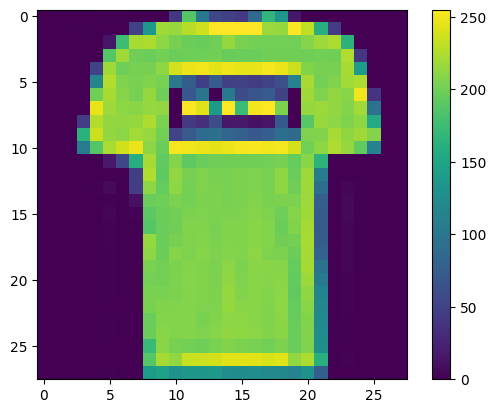

In [ ]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images, test_images = train_images/255.0, test_images/255.0

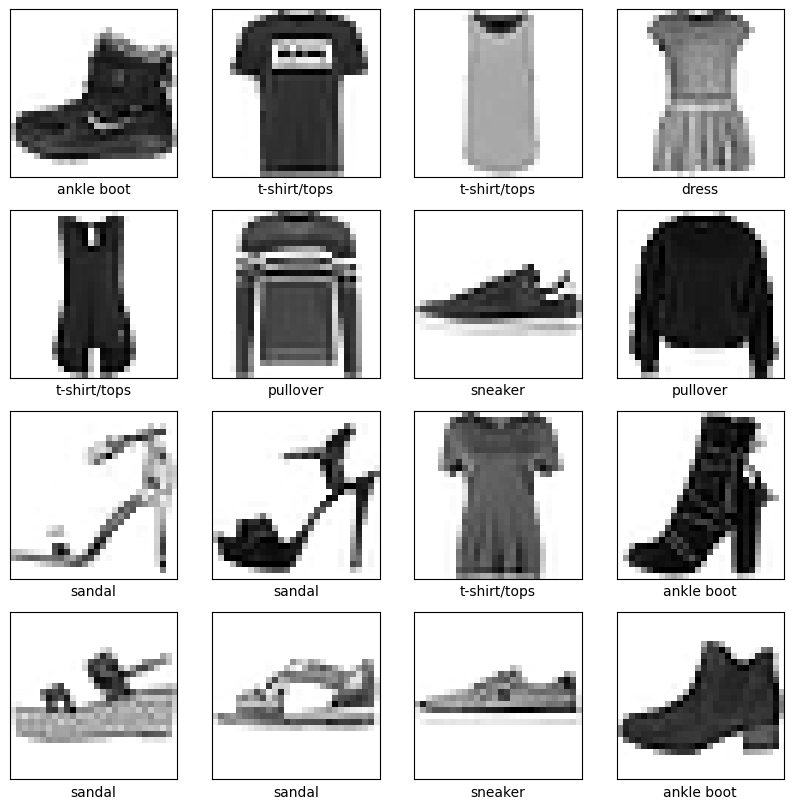

In [ ]:
plt.figure(figsize= (10,10))
for i in range(16):
  plt.subplot(4,4,i+1) # first two indicate the number of subplots, in this case 16, 3rd para indicates the starting point, here 1
  plt.xticks([]) # turn off x labels
  plt.yticks([]) # turn off y labels
  plt.grid(False) # remove the grid
  plt.imshow(train_images[i], cmap = plt.cm.binary) # show the ith image from the training images, cmap part makes the images grayscale
  plt.xlabel(class_names[train_labels[i]]) # fetches the name reference for label number for the respective image
plt.show()

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10) # 10 becuase 10 is the total number of classes it can classify into
])

In [ ]:
model.compile(optimizer= "adam", loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True), metrics= "accuracy")

In [ ]:
model.fit(train_images, train_labels, epochs = 10, validation_data= (test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5003 - accuracy: 0.8229 - val_loss: 0.4445 - val_accuracy: 0.8389
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3747 - accuracy: 0.8640 - val_loss: 0.4107 - val_accuracy: 0.8481
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3384 - accuracy: 0.8764 - val_loss: 0.3587 - val_accuracy: 0.8722
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3136 - accuracy: 0.8844 - val_loss: 0.3663 - val_accuracy: 0.8690
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2948 - accuracy: 0.8910 - val_loss: 0.3490 - val_accuracy: 0.8760
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2826 - accuracy: 0.8950 - val_loss: 0.3365 - val_accuracy: 0.8784
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2693 - accuracy: 0.9002 - val_loss: 0.3349 - val_accuracy:

In [ ]:
test_loss, test_accuracy= model.evaluate(test_images, test_labels, verbose = 2)
print(test_accuracy)

313/313 - 0s - loss: 0.3275 - accuracy: 0.8811 - 310ms/epoch - 992us/step
0.8810999989509583


In [ ]:
prediction_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
 # this line adds the softmax layer to my already defined model

In [ ]:
predictions = prediction_model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


In [ ]:
np.argmax(predictions[0])

9

In [ ]:
test_labels[0]

9

In [ ]:
# Below function to graph the full set of all class predictions,

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

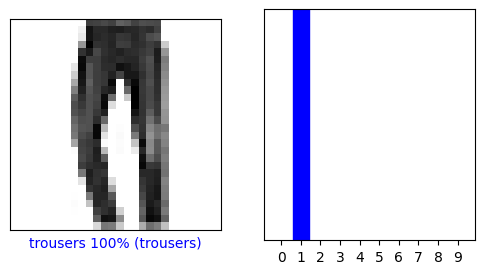

In [ ]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)

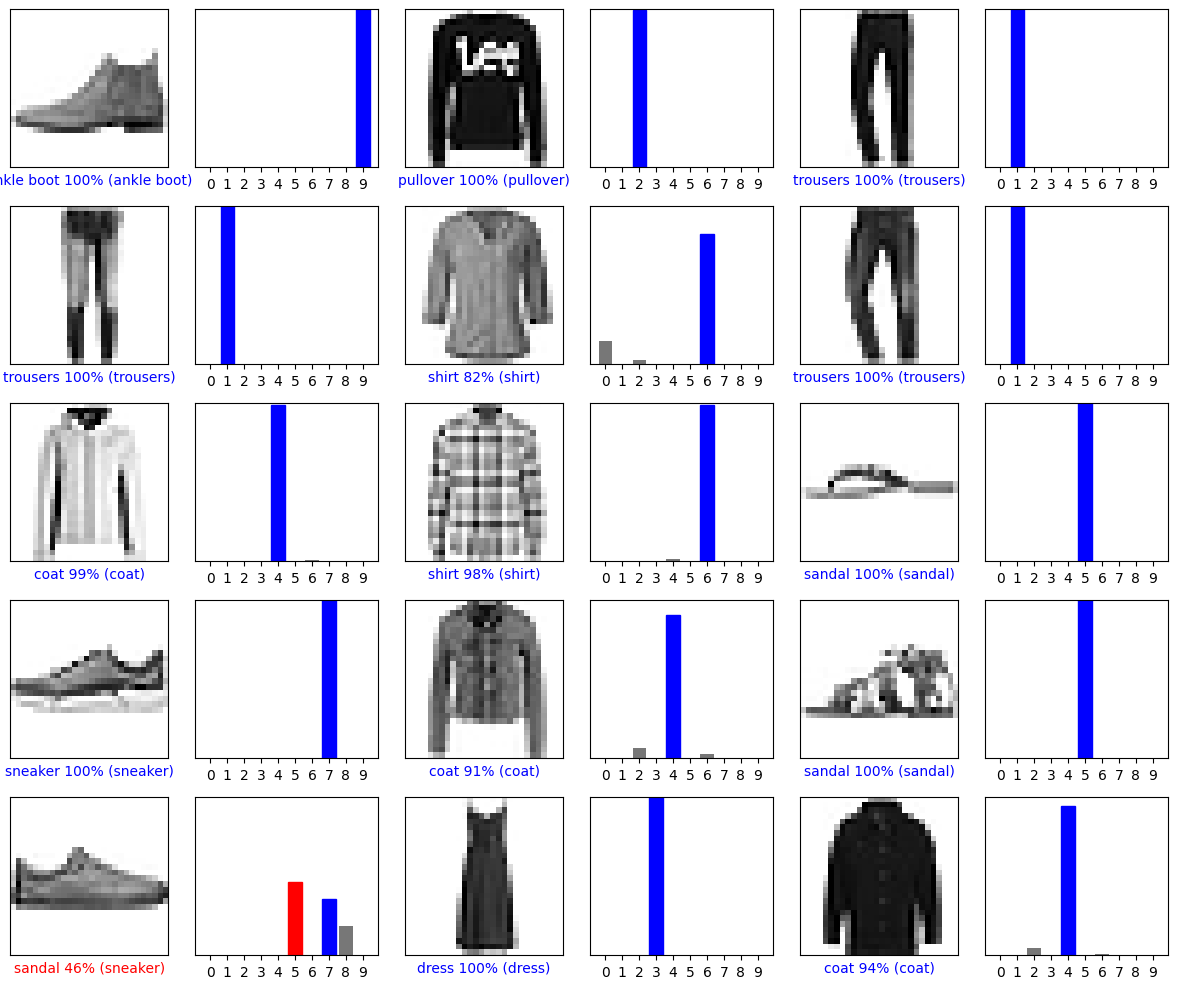

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [ ]:
img = test_images[1]

In [ ]:
img.shape

(28, 28)

In [ ]:
img = np.expand_dims(img,0) # this is used to add a new dimension to the image as the model expects input in a particular
# dimension, in our context tho we added dimnesion to indicate a batch, as the model takes inputs in batches,
# so this image is the only file inside a batch
img.shape

(1, 28, 28)

In [ ]:
prediction_single = prediction_model.predict(img)

1/1 [==============================] - 0s 15ms/step


In [ ]:
prediction_single

array([[1.1270805e-04, 2.7792255e-16, 9.9613357e-01, 4.4307839e-08,
        2.8077883e-03, 2.3527861e-15, 9.4597845e-04, 1.0094055e-18,
        1.4960250e-10, 9.1980864e-16]], dtype=float32)

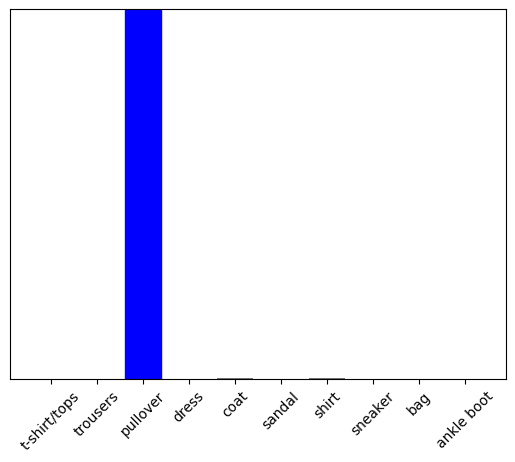

In [ ]:
plot_value_array(1, prediction_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()